In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# define a function to zoom images bit.
def zoom(array, a2=None, return_sl=False, dist_type='both'):
    #    mask = ~np.isnan(array)
    if isinstance(array, np.ma.masked_array):
        array = array.filled(np.nan)
    z = []
    sl = ()
    for i in range(array.ndim):
        if dist_type == 'both':
            with np.errstate(invalid='ignore'):
                darray = array > 0
        elif dist_type == 'zero':
            darray = bool(array)
        elif dist_type == 'nan':
            darray = np.isfinite(array)
        z.append(np.flatnonzero(np.any(darray, axis=tuple(np.delete(np.arange(array.ndim), i)))))
        sl = sl + (slice(z[-1].min(), z[-1].max() + 1),)
    if a2 is None:
        rarray = array
    else:
        rarray = a2
    if return_sl:
        return rarray[sl], sl
    return rarray[sl]

First we load the data as a numpy array

In [21]:
data_imp = np.load('images.npz')
data = data_imp['images']
print(data.shape)
ntis = data.shape[0]
ndays = data.shape[1]
Tissue_names = ['Myelin water','White matter','Grey matter','CSF','Veins/Arteries?']
scans = [f'Scan {k}' for k in range(8)]

(5, 8, 27, 256, 256)


Luckily I know that the data consists of 5 tissue types, 8 subjects and 27 slices

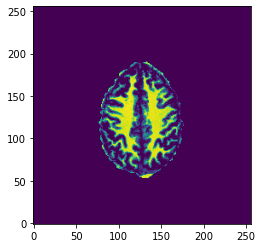

In [10]:
fig, ax = plt.subplots()
ax.imshow(data[1,3,20], origin='lower')

That contains quite some empty space. Let's get rid of those...

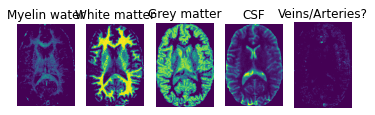

In [20]:
fig, ax = plt.subplots(1,ntis)
for k in range(ntis):
    ax[k].imshow(zoom(data[k,3,15]), origin='lower')
    ax[k].set_title(Tissue_names[k])
    ax[k].axis('off')

In [24]:
data.shape

(5, 8, 27, 256, 256)

Now we can also try to show the different numbers of scans that were performed, please give it a try yourself!

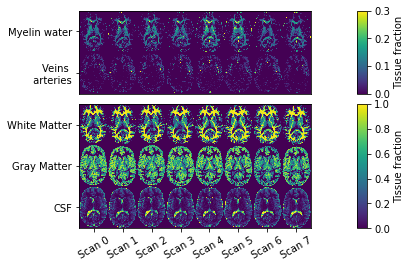

In [25]:

sel_i = [[-1, 0], [3,2,1]]

# fig, ax = plt.subplots(1,len(sel_),figsize=(8,6))
fig = plt.figure()
gr = mpl.gridspec.GridSpec(len(sel_i),2, fig, height_ratios=[len(s) for s in sel_i], width_ratios=[1,.03],hspace=.1,
                           wspace=.00)
axs = [fig.add_subplot(gr[k,0]) for k in range(len(sel_i))]
caxs = [fig.add_subplot(gr[k,1]) for k in range(len(sel_i))]

vmaxs = [.3,1]
ticks = [['Veins \n arteries', 'Myelin water'], ['White Matter', 'Gray Matter', 'CSF'][::-1]]
for k, si in enumerate(sel_i):
    zg = np.moveaxis(zoom(data[:,:,14,...]),1,2)[si]
    ax = axs[k]
    zgi = zg.reshape(zg.shape[0]*zg.shape[1], -1)
    ia = ax.imshow(zgi, cmap='viridis', origin='lower', interpolation='none', vmax=vmaxs[k])
    cb = plt.colorbar(ia, cax=caxs[k])
    cb.set_label('Tissue fraction')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks(np.linspace(0,zgi.shape[0],len(si)+1)[:len(si)]+zgi.shape[0]/(2*len(si)))
    ax.set_yticklabels(ticks[k])
    if k==(len(sel_i)-1):
#         ax.set_ylabel('Tissue component maps')
        ax.xaxis.set_ticks(np.linspace(0,zgi.shape[1],len(scans)+1)[:len(scans)]+zgi.shape[1]/(2*len(scans)))
        ax.set_xticklabels(scans, rotation=30)

# Something cool

In [46]:
%matplotlib ipympl
import sigpy.plot as sgsp
sgsp.ImagePlot(zoom(data), colormap='viridis')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [58]:
import itkwidgets, itk
im = zoom(data[1,4]).copy()
im[np.isnan(im)] = 0.0
im = itk.image_from_array(im)
im.SetSpacing([1.2,1.2,6.2])
im.SetOrigin((78.0, 76.0, -77.0))
viewer = itkwidgets.view(im, sample_distance=0.25, gradient_oppacity=[.25])
viewer
# itkwidgets.view(im)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [49]:
im.

(27, 256, 256)